In [1]:
import shutil 
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image as ImgDisplay
from sklearn.model_selection import train_test_split

In [2]:
"""
https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
adresisnden
    img_align_celebA klasörüyle
    list_attr_celeba.csv dosyasını indir ve projedeki dataset klasörüne at.
"""

image_dir = "./img_align_celeba/img_align_celeba"
attributes_file = "./list_attr_celeba.csv"
output_dir = "./preprocessed_dataset_celeba"

In [3]:
data = pd.read_csv(attributes_file)
print(data.head())

     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

In [6]:
# Siyah saç özelliği "1" olan Kadın ünlülerden 1000 tane örnek seçtik, dataframe'e attık.
df_blackHair = data.loc[data["Black_Hair"] == 1 & (data["Male"] == -1)].sample(n = 1000) 
df_blonde = data.loc[data["Blond_Hair"] == 1 & (data["Male"] == -1)].sample(n = 1000)

#Sarı saç özelliği "1" olan Kadın ünlülerden 1000 tane örnek seçtik, dataframe'e attık.

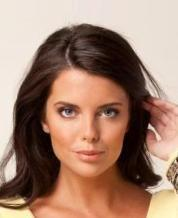

In [7]:
ImgDisplay(os.path.join(image_dir, df_blackHair.iloc[0]["image_id"]))

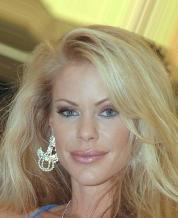

In [8]:
ImgDisplay(os.path.join(image_dir, df_blonde.iloc[0]["image_id"]))

In [9]:
#Seçilen resimlerin isimlerine daha rahat ulaşmak için bir listeye kaydedelim
domainK, domainD = [] , []

for index, row in df_blackHair.iterrows():
    domainK.append(row["image_id"])

for index, row in df_blonde.iterrows():
    domainD.append(row["image_id"])

In [13]:
# Train ve test verilerini ilk seçtiğimiz 1000'er resimden bölerek oluşturalım.
K_train, K_test = train_test_split(domainK, test_size = 0.01, random_state = 1453 )
D_train, D_test = train_test_split(domainD, test_size = 0.01, random_state = 1453 )


In [15]:
#tain klasörlerinin pathlerini belirleyip kayıt dosyalarını oluşturuyoruz.
K_train_dir = os.path.join(output_dir, "Train/Black")
D_train_dir = os.path.join(output_dir, "Train/Blonde")

os.makedirs(K_train_dir, exist_ok = True)
os.makedirs(D_train_dir, exist_ok = True)

#orijinal lokasyondan yeni lokasyona kopyalıyoruz.
for imageK, imageD in zip(K_train, D_train):
    shutil.copy(os.path.join(image_dir, imageK), os.path.join(K_train_dir, imageK))
    shutil.copy(os.path.join(image_dir, imageD), os.path.join(D_train_dir, imageD))

#train klasörlerinin yolları belirlenir ve kayıt klasörleri oluşturulur.
K_test_dir = os.path.join(output_dir, "Test/Black")
D_test_dir = os.path.join(output_dir, "Test/Blonde")

os.makedirs(K_test_dir, exist_ok = True)
os.makedirs(D_test_dir, exist_ok = True)

#orijinal lokasyondan yeni lokasyona kopyalıyoruz.
for imageK, imageD in zip(K_test, D_test):
    shutil.copy(os.path.join(image_dir, imageK), os.path.join(K_test_dir,imageK))
    shutil.copy(os.path.join(image_dir, imageD), os.path.join(D_test_dir, imageD))